# Predicting y Column Using Logistic Regression

### Step 1: Importing Necessary Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Step 2: Loading and Encoding Data

In [8]:
data = pd.read_csv('Students_data.csv')

labelencoder = LabelEncoder()
for feature in ['from1', 'from2', 'from3', 'from4']:
    data[feature] = labelencoder.fit_transform(data[feature])

### Step 3: Choosing Features and Target Variable

In [9]:
# Choosing features and target variable
features = ['from1', 'from2', 'from3', 'from4']
X = data[features]
y = data['y']

### Step 4: Normalizing the Data

In [10]:

# Normalizing the data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


### Step 5: Splitting Data into Training and Testing Sets

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Step 6: Training a Logistic Regression Model

In [12]:

# Instantiating the model
logReg = LogisticRegression()

# Fitting the model
logReg.fit(X_train, y_train)


LogisticRegression()

#### Step 7: Making Predictions and Calculating Accuracy and Mean Squared Error

In [13]:

# Making predictions
y_pred = logReg.predict(X_test)

# Calculating accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}%')

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Accuracy: 66.66666666666666%
Mean Squared Error: 0.9047619047619048


#### Step 8: Plotting Actual and Predicted Observations for Each Feature

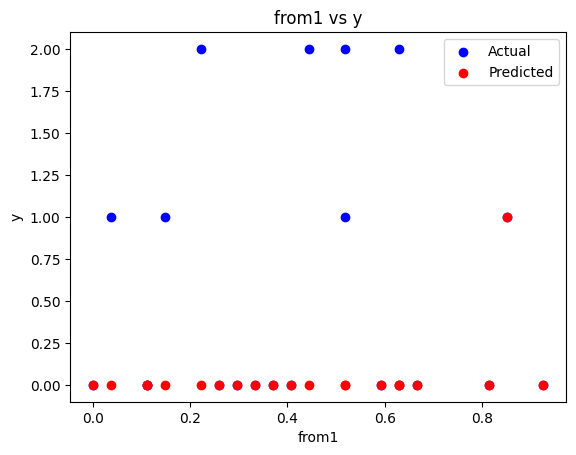

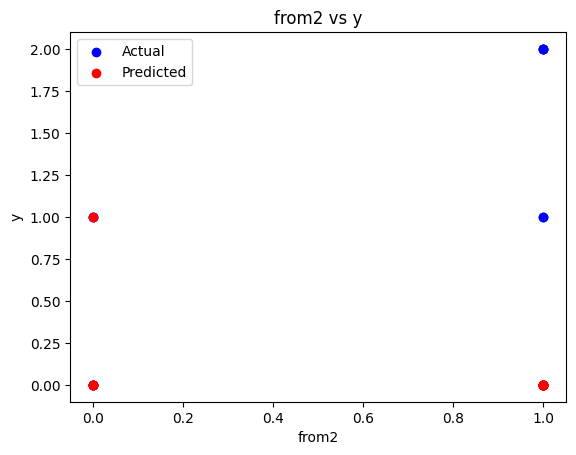

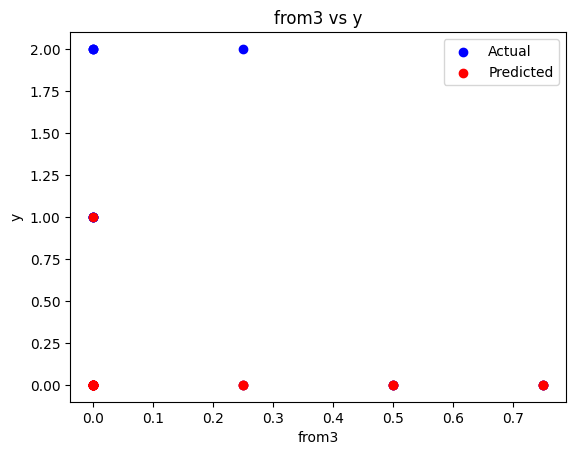

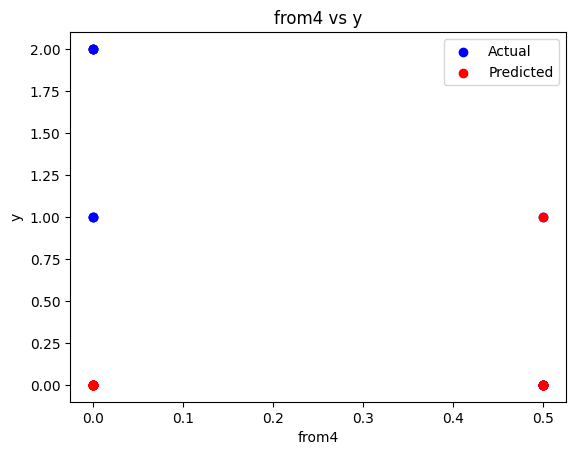

In [14]:

# Plotting results
for feature in features:
    fig, ax = plt.subplots()
    ax.scatter(X_test[feature], y_test, color='blue', label='Actual')
    ax.scatter(X_test[feature], y_pred, color='red', label='Predicted')
    ax.set_title(f'{feature} vs y')
    ax.set_xlabel(feature)
    ax.set_ylabel('y')
    ax.legend()
    plt.show()